# Lasso Regression

*Linear Regression using least square loss with $L_1$ regularization penalty*

---
* [Theory and Derivation](../theory/lasso_regression.ipynb)
* [Implementation in Python](../pymlalgo/regression/lasso_regression.py)

---

In [1]:
import numpy as np
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import pandas as pd

In [2]:
#Looking for modules in the current project directory
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from pymlalgo.regression.lasso_regression import LassoRegression


**Testing Lasso regression on real world dataset**

**The demo uses the [Hitters Dataset]("https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv") where salary is the reponse variable**

In [4]:
hitters = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv", sep= ",", header=0)

#Removing Nan values
hitters.dropna(inplace = True)

#Encoding cateogrial variables 
hitters["NewLeague"] = hitters["NewLeague"].astype('category')
hitters["League"] = hitters["League"].astype('category')
hitters["Division"] = hitters["Division"].astype('category')
hitters["NewLeague"] = hitters["NewLeague"].cat.codes
hitters["League"] = hitters["League"].cat.codes
hitters["Division"] = hitters["Division"].cat.codes


predictors = hitters.drop('Salary',axis = 1)
response = hitters['Salary']

**Split the dataset into test train**

In [5]:
from pymlalgo.util.model_selection import train_test_split

predictors = np.asarray(predictors)
response = np.asarray(response)
response = response.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(predictors,response, test_size = 0.15)

**Normalize the Data**

In [6]:
from pymlalgo.util.standardization import Standardizer

x_standardizer = Standardizer(x_train)
x_train = x_standardizer.standardize(x_train)
x_test = x_standardizer.standardize(x_test)

y_standardizer = Standardizer(y_train)
y_train = y_standardizer.standardize(y_train)
y_test = y_standardizer.standardize(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((226, 19), (39, 19), (226, 1), (39, 1))

**Training the model using LassoRegression with lambda = 0.01 using cyclic coordinate descent and random coordinate descent**

In [7]:
model = LassoRegression(x_train, y_train, lambd=0.01, max_iter=10000)

In [8]:
model.cycliccoorddescent()

**Cost history vs number of iterations and beta history vs number of iterations for cyclic coordinate descent**

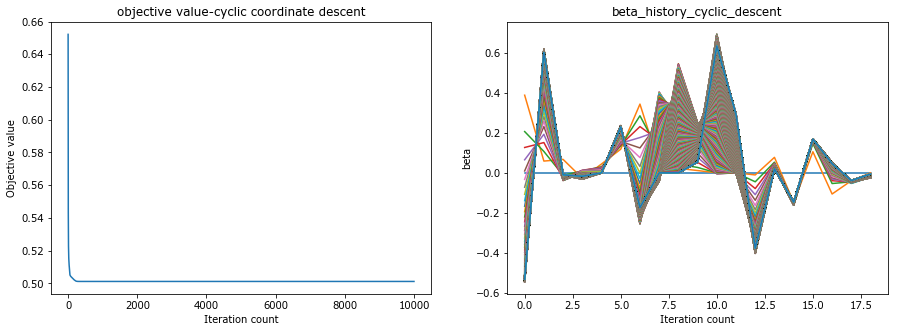

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(model.cost_history_cyclic)
ax[0].set_title('objective value-cyclic coordinate descent')
ax[0].set_xlabel('Iteration count')
ax[0].set_ylabel('Objective value')

ax[1].plot(model.beta_history_cyclic)
ax[1].set_title('beta_history_cyclic_descent')
ax[1].set_ylabel('beta')
ax[1].set_xlabel('Iteration count')

fig.savefig('plot2.png')

**Cost history vs number of iterations and beta history vs number of iterations for random coordinate descent**

In [10]:
model.randcoorddescent()

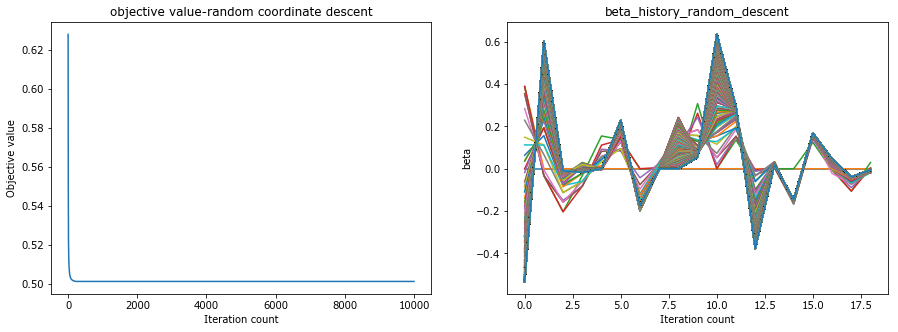

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(model.cost_history_rand[1:])
ax[0].set_title('objective value-random coordinate descent')
ax[0].set_xlabel('Iteration count')
ax[0].set_ylabel('Objective value')

ax[1].plot(model.beta_history_random)
ax[1].set_title('beta_history_random_descent')
ax[1].set_ylabel('beta')
ax[1].set_xlabel('Iteration count')

fig.savefig('plot2.png')

**Comparision of algorithm with sklearn Lasso**

**Objective function in sklearn uses $\alpha$ as the regularization parameter. The relation between $\alpha$ and $\lambda$ is given as 
$$\lambda = 2\alpha$$**

In [12]:
from sklearn.linear_model import Lasso
clf_cyclic = Lasso(alpha=(0.01/2), max_iter=10000)
clf_cyclic.fit(x_train,y_train)
sk_beta_cyclic = clf_cyclic.coef_
clf_random = Lasso(alpha=(0.01/2), max_iter=10000, selection= 'random')
clf_random.fit(x_train,y_train)
sk_beta_random = clf_random.coef_

In [13]:
pd.DataFrame({'cyclic_descent' : model.cyclic_beta.flatten(), 'sk_cyclic': sk_beta_cyclic.flatten(), 'random_descent' : model.random_beta.flatten(), 
              'sk_random' : sk_beta_random.flatten()})

,cyclic_descent,sk_cyclic,random_descent,sk_random
0,-0.532283,-0.532391,-0.532283,-0.532558
1,0.601794,0.601739,0.601794,0.602389
2,-0.009843,-0.009715,-0.009843,-0.009890
3,-0.017114,-0.017140,-0.017114,-0.017426
4,0.000000,-0.000000,0.000000,-0.000000
5,0.229246,0.229327,0.229246,0.229266
6,-0.173741,-0.174060,-0.173741,-0.173457
7,0.000000,-0.000000,0.000000,-0.000000
8,0.000000,0.000000,0.000000,0.000000
9,0.054572,0.053864,0.054572,0.055800
